<a href="https://colab.research.google.com/github/ggangminmin/Python-analysis/blob/main/%EA%B1%B0%EC%A3%BC_%EC%9C%A0%ED%98%95%EB%B3%84_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('credit_default.csv')
df

,uid,residence,income,years_of_employment,delinquent_taxes,foreclosures,years_of_credit,max_credit,credit_problems,delinquent_months,personal_bankruptcies,purpose,repayment_term,loan_balance,outstanding_credit,monthly_repayment,credit_score,delinquency
0,TRAIN_00000,자가,1941337.5,10년 이상,0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,월세,1356381.0,4년,0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,월세,1049017.5,6년,0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,월세,4320217.5,2년,0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRAIN_09995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0,9,18.7,319027.5,0,68,0,부채 통합,단기 상환,126216.0,177028.5,6237.0,755,0
9996,TRAIN_09996,주택 담보 대출 (거주 중),2297230.5,2년,0,11,28.3,399799.5,0,7,0,주택 개보수,장기 상환,371907.0,347449.5,53301.0,707,0
9997,TRAIN_09997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0,9,30.1,823305.0,0,14,0,부채 통합,장기 상환,869736.0,176905.5,11436.0,733,0
9998,TRAIN_09998,자가,3343584.0,10년 이상,0,10,20.3,724314.0,0,25,0,부채 통합,단기 상환,443008.5,139294.5,25567.5,696,0


In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib  # matplotlib 그래프에서 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'  # 또는 'Malgun Gothic' (윈도우), 'AppleGothic' (Mac)


!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.6 MB/s eta 0:00:00


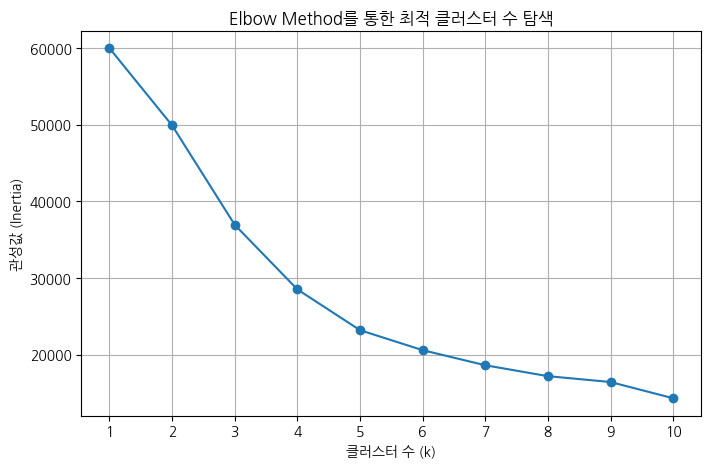

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import koreanize_matplotlib  # 한글 폰트 설정 자동 적용


# 클러스터링에 활용할 변수 선택
features = df[['residence', 'income', 'monthly_repayment', 'credit_score', 'delinquency']]

# 범주형 변수인 'residence'를 원-핫 인코딩 처리
features_encoded = pd.get_dummies(features, columns=['residence'], drop_first=True)

# 타겟 변수 'delinquency'는 클러스터링 대상에서 제외 (분석용으로는 보존)
target = features_encoded['delinquency']
features_encoded = features_encoded.drop('delinquency', axis=1)

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# Elbow Method로 적정 클러스터 수 탐색
inertia = []
k_range = range(1, 11)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

# Elbow plot 출력
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xticks(k_range)
plt.xlabel('클러스터 수 (k)')
plt.ylabel('관성값 (Inertia)')
plt.title('Elbow Method를 통한 최적 클러스터 수 탐색')
plt.grid(True)
plt.show()


In [ ]:
# 실행 상태 초기화로 인해 다시 필요한 코드 실행
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 로드
file_path = "/mnt/data/credit_default.csv"
df = pd.read_csv('credit_default.csv')

# 필요한 컬럼 선택 및 전처리
features = df[['residence', 'income', 'monthly_repayment', 'credit_score', 'delinquency']]
features_encoded = pd.get_dummies(features, columns=['residence'], drop_first=True)
target = features_encoded['delinquency']
features_encoded = features_encoded.drop('delinquency', axis=1)

# 정규화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# KMeans 클러스터링 (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# 클러스터 결과 원본 데이터프레임에 추가
df_clustered = df.copy()
df_clustered['cluster'] = clusters

# 클러스터별 통계 요약
summary = df_clustered.groupby('cluster').agg({
    'residence': lambda x: x.value_counts().index[0],  # 최빈값
    'income': 'mean',
    'monthly_repayment': 'mean',
    'credit_score': 'mean',
    'delinquency': ['mean', 'count']
})

# 오류 회피: pandas DataFrame 그대로 출력
summary.reset_index(inplace=True)
summary




cluster         residence        income monthly_repayment credit_score  \
                   <lambda>          mean              mean         mean   
0       0                자가  1.982892e+06      20344.750446   733.913839   
1       1  주택 담보 대출 (비거주 중)  2.023525e+06      17168.565789   749.276316   
2       2   주택 담보 대출 (거주 중)  2.734349e+06      27215.225453   741.444685   
3       3                월세  1.739462e+06      19107.365688   752.474793   

  delinquency        
         mean count  
0    0.327679  2240  
1    0.157895    76  
2    0.303760  3697  
3    0.387008  3987

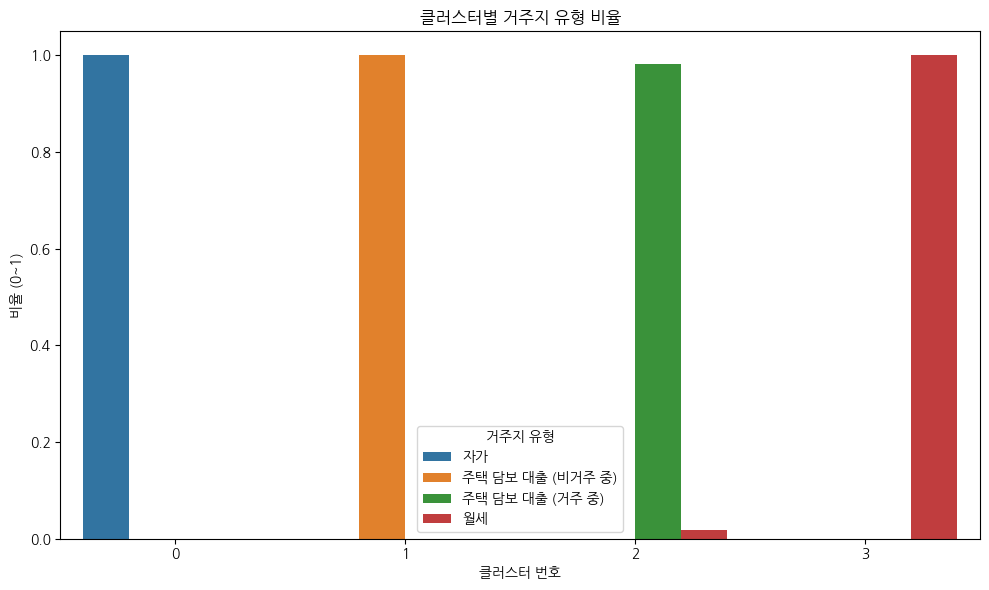

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('credit_default.csv')

# 클러스터링 결과가 저장된 데이터프레임 (기존에 분석했던 것과 동일하게 구성)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 필요한 컬럼 선택 및 전처리
features = df[['residence', 'income', 'monthly_repayment', 'credit_score', 'delinquency']]
features_encoded = pd.get_dummies(features, columns=['residence'], drop_first=True)
scaled_features = StandardScaler().fit_transform(features_encoded.drop('delinquency', axis=1))

# 클러스터링 (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# 클러스터 열 추가
df_clustered = df.copy()
df_clustered['cluster'] = clusters

# 클러스터별 거주지 비율 계산
residence_ratio = df_clustered.groupby('cluster')['residence'].value_counts(normalize=True).rename('비율').reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=residence_ratio, x='cluster', y='비율', hue='residence')
plt.title('클러스터별 거주지 유형 비율')
plt.ylabel('비율 (0~1)')
plt.xlabel('클러스터 번호')
plt.legend(title='거주지 유형')
plt.tight_layout()
plt.show()


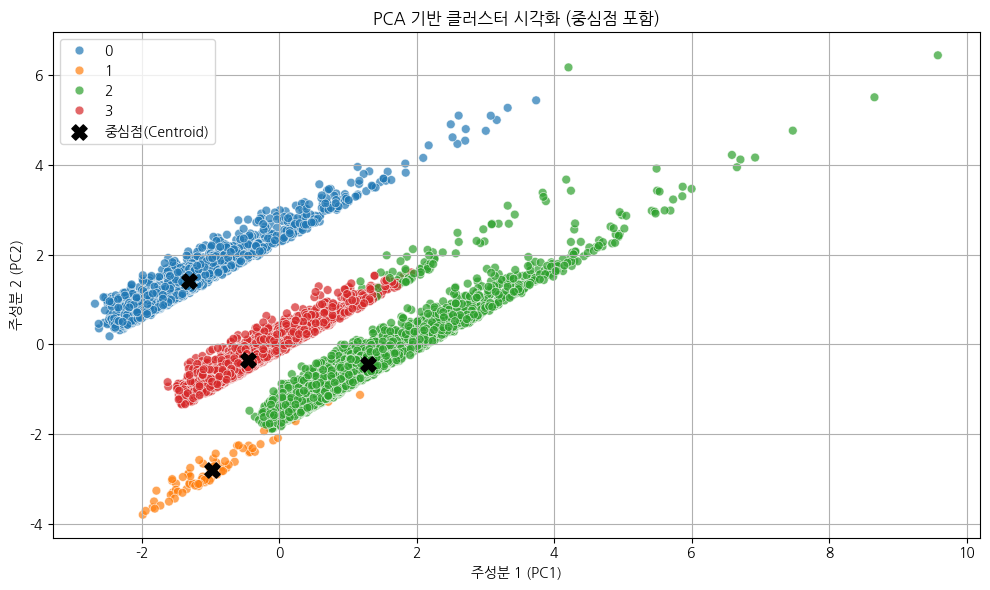

In [ ]:
# 1. 전처리 및 클러스터링
features = df[['residence', 'income', 'monthly_repayment', 'credit_score', 'delinquency']]
features_encoded = pd.get_dummies(features, columns=['residence'], drop_first=True)
target = features_encoded['delinquency']
features_encoded = features_encoded.drop('delinquency', axis=1)

# 2. 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# 3. KMeans 클러스터링
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# 4. 원본 데이터에 클러스터 결과 추가
df_clustered = df.copy()
df_clustered['cluster'] = clusters

# 5. PCA를 활용한 2차원 시각화
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# 데이터프레임화
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# 중심점 PCA 변환
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=40, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=120, marker='X', label='중심점(Centroid)')
plt.title('PCA 기반 클러스터 시각화 (중심점 포함)')
plt.xlabel('주성분 1 (PC1)')
plt.ylabel('주성분 2 (PC2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


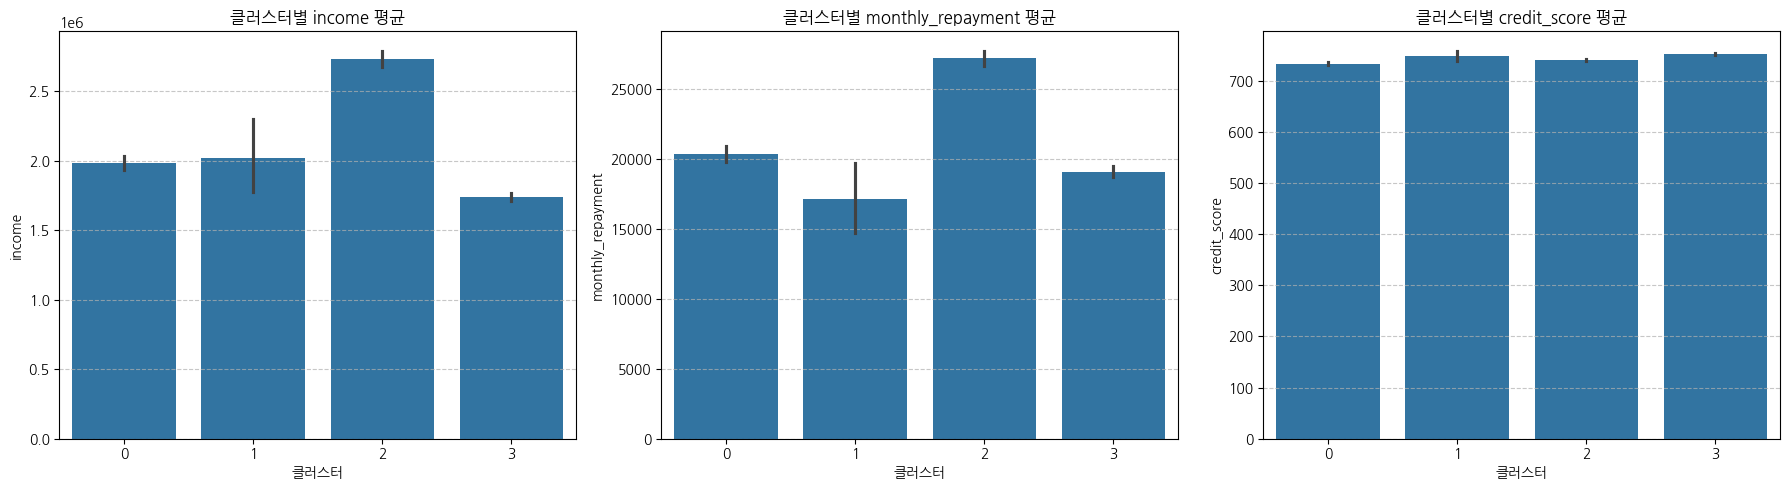

In [ ]:
# 초기화로 인해 재실행
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 로드 및 전처리
df = pd.read_csv('credit_default.csv')
features = df[['residence', 'income', 'monthly_repayment', 'credit_score']]
features_encoded = pd.get_dummies(features, columns=['residence'], drop_first=True)

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# 클러스터링 (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# 클러스터 결과 추가
df_clustered = df.copy()
df_clustered['cluster'] = clusters

# 개별 변수별 클러스터 평균 시각화
variables = ['income', 'monthly_repayment', 'credit_score']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(variables):
    sns.barplot(x='cluster', y=var, data=df_clustered, ax=axes[i])
    axes[i].set_title(f'클러스터별 {var} 평균')
    axes[i].set_xlabel('클러스터')
    axes[i].set_ylabel(var)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['uid', 'residence', 'income', 'years_of_employment', 'delinquent_taxes',
       'foreclosures', 'years_of_credit', 'max_credit', 'credit_problems',
       'delinquent_months', 'personal_bankruptcies', 'purpose',
       'repayment_term', 'loan_balance', 'outstanding_credit',
       'monthly_repayment', 'credit_score', 'delinquency'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 1. target 설정 - 이진분류 대신 연속형으로 delinquency 직접 사용
# 2. feature 선정
features = ['loan_balance', 'credit_score', 'monthly_repayment', 'outstanding_credit']
X = df[features]
y = df['delinquency']

# 3. 상수항 추가 (statsmodels는 필요함)
X = sm.add_constant(X)

# 4. 로지스틱 회귀 모델 적합 (이진 아님, 연속형 종속변수로 일반화된 로지스틱 회귀로 해석)
# NOTE: y가 이진이 아니라 연속형이라면 일반적인 로지스틱 회귀는 적절치 않지만,
# 분포가 sigmoid 형태라면 GLM(Logit link) 또는 OLS 대체로 접근 가능
# 예시는 logit으로 가정
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# 결과 요약
summary = result.summary2().tables[1]
summary_rounded = summary.round(4)

from IPython.display import display
display(summary_rounded)


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,2.4410,0.2883,8.4667,0.0000,1.8760,3.0061
loan_balance,-0.0000,0.0000,-5.1292,0.0000,-0.0000,-0.0000
credit_score,-0.0039,0.0004,-10.4262,0.0000,-0.0047,-0.0032
monthly_repayment,-0.0000,0.0000,-0.3906,0.6961,-0.0000,0.0000
outstanding_credit,0.0000,0.0000,2.5974,0.0094,0.0000,0.0000


In [ ]:
# 초기화로 인한 코드 재실행
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 로드
df = pd.read_csv('credit_default.csv')

# 타겟 변수: 월세 여부
df['is_rent'] = (df['residence'] == '월세').astype(int)

# 설명 변수: 대출 의존 특성과 관련된 변수들
X = df[['income', 'monthly_repayment', 'credit_score']]
y = df['is_rent']

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# 결과 출력
report_df = pd.DataFrame(report).transpose().round(3)
report_df

,precision,recall,f1-score,support
0,0.639,0.840,0.726,1788.000
1,0.559,0.299,0.389,1212.000
accuracy,0.621,0.621,0.621,0.621
macro avg,0.599,0.569,0.557,3000.000
weighted avg,0.606,0.621,0.590,3000.000
